In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
from utils import load_mnist
from trainer import Trainer

In [4]:
from argparse import Namespace

config = {
    'train_ratio': .8,
    'batch_size': 256,
    'n_epochs': 50,
    'verbose': 1,
    'btl_size': 2
}

config = Namespace(**config)

print(config)

Namespace(train_ratio=0.8, batch_size=256, n_epochs=50, verbose=1, btl_size=2)


In [5]:
def show_img(x):


    if x.dim() == 1:
        x = x.view(int(x.size(0) ** .5), -1)

    plt.imshow(x, cmap='gray')
    plt.show()

In [6]:
train_x, train_y = load_mnist(flatten=True)
test_x, test_y = load_mnist(is_train=False, flatten=True)

train_cnt = int(train_x.size(0) * config.train_ratio)
valid_cnt = train_x.size(0) - train_cnt

indices = torch.randperm(train_x.size(0))
train_x, valid_x = torch.index_select(train_x, dim=0, index=indices).split([train_cnt, valid_cnt], dim=0)
train_y, valid_y = torch.index_select(train_y, dim=0, index=indices).split([train_cnt, valid_cnt], dim=0)

print("Train:", train_x.shape, train_y.shape)
print("Valid:", valid_x.shape, valid_y.shape)
print("Test:", test_x.shape, test_y.shape)

Train: torch.Size([48000, 784]) torch.Size([48000])
Valid: torch.Size([12000, 784]) torch.Size([12000])
Test: torch.Size([10000, 784]) torch.Size([10000])


In [7]:
from model import Autoencoder

In [8]:
model = Autoencoder(btl_size=config.btl_size)
optimizer = optim.Adam(model.parameters())
crit = nn.MSELoss()

trainer = Trainer(model, optimizer, crit)

In [9]:
trainer.train((train_x, train_x), (valid_x, valid_x), config)

Epoch (1/50): train_loss=7.1565e-02  valid_loss=4.8843e-02  lowest_loss=4.8843e-02
Epoch (2/50): train_loss=4.7101e-02  valid_loss=4.4534e-02  lowest_loss=4.4534e-02
Epoch (3/50): train_loss=4.4811e-02  valid_loss=4.2814e-02  lowest_loss=4.2814e-02
Epoch (4/50): train_loss=4.3357e-02  valid_loss=4.1755e-02  lowest_loss=4.1755e-02
Epoch (5/50): train_loss=4.2343e-02  valid_loss=4.1143e-02  lowest_loss=4.1143e-02
Epoch (6/50): train_loss=4.2086e-02  valid_loss=4.0818e-02  lowest_loss=4.0818e-02
Epoch (7/50): train_loss=4.1474e-02  valid_loss=3.9538e-02  lowest_loss=3.9538e-02
Epoch (8/50): train_loss=4.0657e-02  valid_loss=3.9566e-02  lowest_loss=3.9538e-02
Epoch (9/50): train_loss=4.0702e-02  valid_loss=4.0138e-02  lowest_loss=3.9538e-02
Epoch (10/50): train_loss=4.0321e-02  valid_loss=3.9091e-02  lowest_loss=3.9091e-02
Epoch (11/50): train_loss=3.9975e-02  valid_loss=3.9014e-02  lowest_loss=3.9014e-02
Epoch (12/50): train_loss=3.9521e-02  valid_loss=3.8401e-02  lowest_loss=3.8401e-02
E

### Test

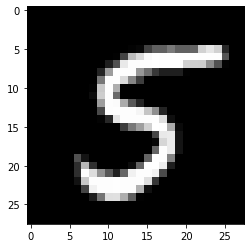

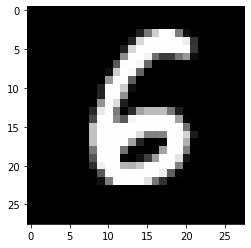

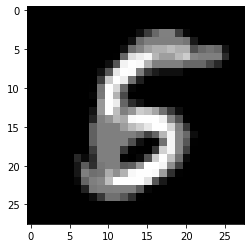

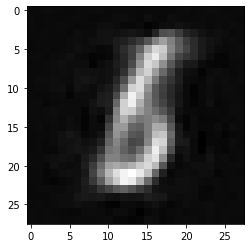

In [13]:
with torch.no_grad():
    import random

    index1 = int(random.random() * test_x.size(0))
    index2 = int(random.random() * test_x.size(0))

    z1 = model.encoder(test_x[index1].view(1, -1))
    z2 = model.encoder(test_x[index2].view(1, -1))

    recon = model.decoder((z1+z2) / 2).squeeze()

    show_img(test_x[index1])
    show_img(test_x[index2])
    show_img((test_x[index1] + test_x[index2])/ 2)
    show_img(recon)